# Python for Data Science Project Session 5: Economics and Finance

## Introduction


In this session, we will look at two mini projects related to Economics/Finance, applying techniques covered in Session Five and extending these a bit further. To start, we will import our general data science packages here, and then add the necessary machine learning imports as we go along so that it's clear when to use what: 

In [1]:
# Importing key data science libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Convergence warning disabling
from sklearn.exceptions import ConvergenceWarning
from warnings import simplefilter

simplefilter("ignore", category=ConvergenceWarning)

## Mini-Projects
> [Classification: Which companies go bust?](#Classification:-Which-companies-go-bust?)
>
> [Regression: What are the drivers of worker productivity?](#Regression:-What-are-the-drivers-of-worker-productivity?)


## Classification: Which companies go bust?
For this project, we will aim to predict if a company is likely to go bankrupt given a variety of accounting and financial metrics. To do this, we will use  data collected from the Taiwan Economic Journal for the years 1999 to 2009. This kind of model would have all sorts of real world applications, from portfolio stock picks to loan approvals.

### Data set overview

To start out, lets get an overview of our data set dimensions and feature types. We'll be doing a very simple overview in this section but feel free to perform more extensive EDA on your own: the more you know about your data, the better you can harness it through modelling.

Start out with the following tasks:
- Read in the data set as a pandas DataFrame (file path: `data/bankruptcy.csv`)
- Output the first five data set rows
- Print out a comprehensive summary of the data set (dimensions, variable names, data types, and null values)

In [2]:
# Read bankruptcy data set
data = pd.read_csv('data/bankruptcy.csv')

In [3]:
# Output the first five rows
data.head(5)

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [4]:
# Print the data set overview (dimensions, variable names, data types, null values)
#data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt                                                  6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

### Our ML setup
To start our project we want to set up our data in the usual machine learning configuration: a training and a test set, each with its own feature matrix and target vector. To start:

- Import the `train_test_split()` function from scikit learn
- Declare a target vector y (corresponding to the `Bankrupt` column in the data set)
- Declare a feature matrix X (including all columns except `Bankrupt`)
- Create a training and test set
- Print the dimensions of X and y in both the training and test set.

In [5]:
# Importing train-test split function
from sklearn.model_selection import train_test_split

In [6]:
# Declare the target vector y which has the column label 'Bankrupt'
y = data.Bankrupt

In [7]:
# Declare feature matrix
X = data.drop(columns = 'Bankrupt') # feature matrix are the variable predictors of bankruptcy in our eyes

In [8]:
# Create a train-test- split using random state 253, test_size 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=253)

In [9]:
print('X_train dimensions: ', X_train.shape)
print('y_train dimensions: ', y_train.shape)

X_train dimensions:  (4773, 95)
y_train dimensions:  (4773,)


In [10]:
print('X_test dimensions: ', X_test.shape)
print('y_test dimensions: ', y_test.shape)

X_test dimensions:  (2046, 95)
y_test dimensions:  (2046,)


### Dimensionality reduction

One problem that is immediately apparent is that we have a high number of features in our data. This constitutes a problem as capturing the complexities of a highly dimensional space through our model can lead us to **overfitting**. 
> This is known as the [Curse of Dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality#Machine_Learning) and is definitely a topic worth exploring further.


In order to cope with the high dimensionality of our data we can employ several dimensionality reduction techniques. The first one we'll explore is called **Principal Component Analysis (PCA)** and for a more in-depth treatment of the subject be sure to refer [here](https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c). PCA essentially works by projecting our data points (which can be seen as vectors) into a lower dimensional space while maximizing the conserved variance of our data.

Try out PCA on the training feature matrix `X_train` below:
- Import the `PCA` class from the `sklearn.decomposition` module.
- Decide on a number for `n_components`. This is going to be the new number of features.
- Create a PCA transformer.
- Train the transformer using the `.fit()` method.
- Apply dimensionality reduction using the `.transform()` method.
- Output the first five rows.

> **Note:** The `.tranfrom()` method will return a NumPy array as opposed to a pandas DataFrame.

In [11]:
# Importing PCA class
from sklearn.decomposition import PCA

## Finding the optimal number of components for our PCA decomposition

To find the optimal number of components...

In [12]:
covar_matrix = PCA(n_components = X_train.shape[1])
covar_matrix.fit(X_train)


PCA(n_components=95)

Text(0.5, 1.0, 'Scree Plot')

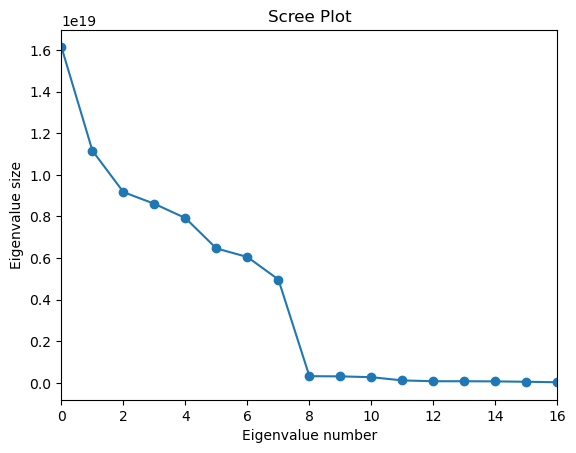

In [13]:
plt.plot(covar_matrix.explained_variance_, marker='o')
#plt.plot(np.cumsum(covar_matrix.explained_variance_), marker='x')
plt.xlim(0,16)
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue size")
plt.title("Scree Plot")

From the Scree plot, we can identify a large drop in expected variance in at the 8th index. We should therefore select 8 as the number of components for our model.

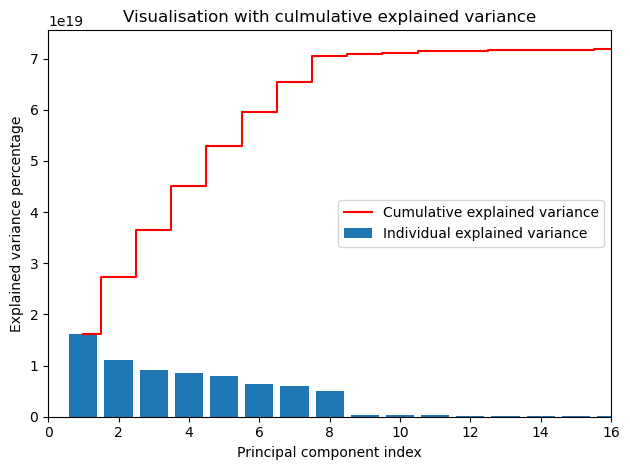

In [14]:
exp_var = covar_matrix.explained_variance_
exp_var_cum = np.cumsum(exp_var)

plt.bar(range(1, 96), exp_var, align='center',
        label='Individual explained variance')

plt.step(range(1, 96), exp_var_cum, where='mid',
         label='Cumulative explained variance', color='red')

plt.ylabel('Explained variance percentage')
plt.xlabel('Principal component index')
plt.xlim(0,16)
plt.title('Visualisation with culmulative explained variance')
plt.legend(loc='best')
plt.tight_layout()

plt.savefig("Barplot.png")


In [15]:
# Create PCA transformer that keeps 30 components 
pca30 = PCA(n_components = 30)

In [16]:
# Fit and transform using our PCA model
pca30.fit(X_train) # fits it to xtrain
print(X_train.shape)
X_red = pca30.transform(X_train) # transforms into the lower dimension
print(X_red.shape)
pd.DataFrame(X_red).head()

(4773, 95)
(4773, 30)


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-2.523242e+09,-1.918231e+09,-1.232079e+09,-1.776376e+09,-2.241226e+09,-2.137455e+09,-1.284218e+09,-4.522613e+08,-1.019373e+08,-5.526863e+07,...,5.990670e+08,-9.863251e+05,-1.488518e+06,0.021262,-0.388106,0.039452,-0.105008,-0.000646,0.046449,0.058511
1,-3.190167e+09,-2.229378e+09,-1.542280e+09,-1.132694e+09,-3.550784e+09,-9.206884e+08,4.735889e+09,-7.588887e+08,-1.324696e+08,-8.904601e+06,...,-5.230878e+06,-1.021334e+06,-1.433085e+06,-0.309381,-0.336137,-0.021756,-0.073706,-0.018795,-0.031770,0.026735
2,3.923038e+08,-1.977646e+09,2.672523e+09,-3.915985e+09,1.047293e+09,-3.084126e+09,-3.835881e+08,-1.973793e+08,-7.613600e+07,-3.861154e+07,...,-1.456694e+07,-4.647027e+05,-1.496466e+06,-0.373196,0.290911,-0.039027,0.134702,0.152493,-0.015098,0.055837
3,2.002011e+09,4.168241e+09,-1.769392e+09,9.539553e+08,-3.003403e+09,2.583991e+09,-1.937712e+09,-4.011079e+09,-1.151520e+07,-7.186522e+07,...,-1.115475e+07,-8.677484e+05,-1.694474e+05,-0.091082,-0.308278,0.126774,0.032384,0.124902,0.021413,-0.095182
4,-1.895548e+09,-2.092054e+09,-1.279104e+09,-5.940138e+08,9.752376e+08,-2.481735e+09,-6.981636e+08,-3.100633e+08,-9.929031e+07,-3.954471e+07,...,-1.818691e+07,-1.373497e+06,-1.614229e+06,-0.168585,-0.031901,-0.240893,-0.036218,0.024268,-0.071079,0.135636


### Pipelines

You might've noticed that most machine learning with scikit learn involves:
- Instantiating a transformer or model.
- Fitting this to our data using `.fit()`.
- Transforming or predicting using `.transform()` or `.predict()`.

This simple, general process means that we can simplify our ML process using **Pipelines**. A Pipeline allows you to establish a sequence of transformations terminating with *one estimator*. Pipelines can then be treated as any other scikit learn estimator, but each time they perform all of the interim transformation steps in the sequence. This has the benefit of greatly simplifying your code and can also help prevent [data leakage](https://machinelearningmastery.com/data-leakage-machine-learning/). 

To instantiate a Pipeline you must pass as an argument a list of $n+1$ tuples (where $n$ is the number of transforms) in the form: `[('transformer_1_name', transformer_1), ..., ('estimator_name', estimator)]`.

We will now create Pipelines for a KNN, SVM, and Logistic Regression model below:
- Import the `StandardScaler`, `KNeighborsClassifier`, `SVC`, and `LogisticRegression` classes from scikit learn.
- Import the `Pipeline` class from scikit learn.
- For each one of the three models, create a Pipeline with the following transforms (in order): scaling, PCA, estimator.

In [17]:
# Importing StandardScaler
from sklearn.preprocessing import StandardScaler

In [18]:
# Importing KNN, SVM, and Logistic Regression models 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [19]:
from sklearn.pipeline import Pipeline

In [20]:
# Combine these into three Pipelines, one for each model
knn_pipe = Pipeline([('Scaler', StandardScaler()), 
                     ('PCA', PCA(n_components=30)), 
                     ('Model', KNeighborsClassifier())])

svm_pipe = Pipeline([('Scaler', StandardScaler()), 
                     ('PCA', PCA(n_components=30)), 
                     ('Model', SVC())])

log_reg_pipe = Pipeline([('Scaler', StandardScaler()), 
                         ('PCA', PCA(n_components=30)), 
                         ('Model', LogisticRegression())])

In [21]:
# Creating pipelines for the data's optimised PCA value of 8
knn_pipePCO = Pipeline([('Scaler', StandardScaler()), 
                     ('PCA', PCA(n_components=8)), 
                     ('Model', KNeighborsClassifier())])

svm_pipePCO = Pipeline([('Scaler', StandardScaler()), 
                     ('PCA', PCA(n_components=8)), 
                     ('Model', SVC())])

log_reg_pipePCO = Pipeline([('Scaler', StandardScaler()), 
                         ('PCA', PCA(n_components=8)), 
                         ('Model', LogisticRegression())])

### Alternative evaluation metrics

During Session Five, you were introduced to Accuracy as an evaluation metric for classification model. As a reminder, accuracy is defined as follows:
$$ \text{Accuracy} = \frac{TP+TN}{TP+FP+TN+FN}$$
In other words, it is the ratio of correctly classified samples to the overall number of samples. We're now gonna compute accuracy for our three models. To do this, we use the `cross_val_score()` function from scikit learn (for documentation, see [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html?highlight=cross_val_score#sklearn.model_selection.cross_val_score)). This function calculates the average score (taking accuracy as the default metric for classification models) after carrying out K-fold cross validation, which we prefer in order to reduce bias and thus get a more 'realistic' estimate of our model's performance. 

To start out, print the average accuracy score for each of our models:
- Import the `cross_val_score()` function from scikit learn.
- Calculate the cross-validated scores for each pipeline estimator.
- Print the mean score for each pipeline estimator.

In [22]:
# Importing cross_val_score
from sklearn.model_selection import cross_val_score

In [23]:
# Calculating mean cross-validated scores
knn_score = cross_val_score(knn_pipe, X_train, y_train).mean()
svm_score = cross_val_score(svm_pipe, X_train, y_train).mean()
log_reg_score = cross_val_score(log_reg_pipe, X_train, y_train).mean()

knnPCO_score = cross_val_score(knn_pipePCO, X_train, y_train).mean()
svmPCO_score = cross_val_score(svm_pipePCO, X_train, y_train).mean()
log_regPCO_score = cross_val_score(log_reg_pipePCO, X_train, y_train).mean()

In [24]:
print('KNN Accuracy Score:')
print(knn_score)
print('KNN PCA optimised Accuracy Score:')
print(knnPCO_score)
print('relative improvement:')
print(100*(knnPCO_score-knn_score)/knn_score,'%')

KNN Accuracy Score:
0.963963691044596
KNN PCA optimised Accuracy Score:
0.9635446233549562
relative improvement:
-0.04347338945782482 %


In [25]:
print('SVM Accuracy Score:')
print(svm_score)
print('SVM PCA optimised Accuracy Score:')
print(svmPCO_score)
print('relative improvement:')
print(100*(svmPCO_score-svm_score)/svm_score,'%')

SVM Accuracy Score:
0.9677348612071521
SVM PCA optimised Accuracy Score:
0.9675254371233825
relative improvement:
-0.021640646851187727 %


In [26]:
print('Logistic Regression Accuracy Score:')
print(log_reg_score)
print('Logistic Regression PCA optimised Accuracy Score:')
print(log_regPCO_score)
print('relative improvement:')
print(100*(log_regPCO_score-log_reg_score)/log_reg_score,'%')

Logistic Regression Accuracy Score:
0.9652206745914145
Logistic Regression PCA optimised Accuracy Score:
0.9671059303895418
relative improvement:
0.19531863000400565 %


# Graphical representation

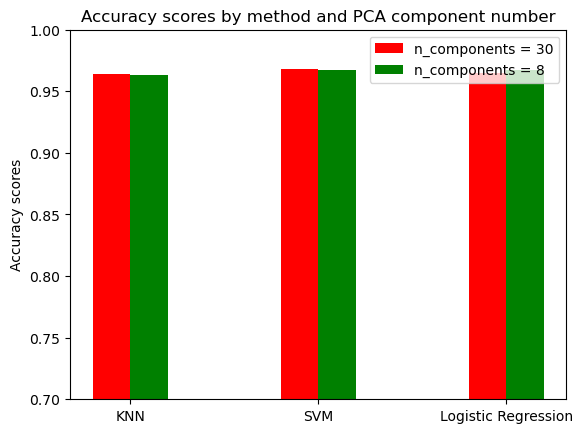

In [27]:
"""
========
Barchart
========

A bar plot with errorbars and height labels on individual bars
"""

N = 3
original_scores = (knn_score,svm_score, log_reg_score)


ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, original_scores, width, color='r')

optimised_scores = (knnPCO_score,svmPCO_score, log_regPCO_score)

rects2 = ax.bar(ind + width, optimised_scores, width, color='g')

# add some text for labels, title and axes ticks
ax.set_ylabel('Accuracy scores')
ax.set_title('Accuracy scores by method and PCA component number')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('KNN', 'SVM', 'Logistic Regression'))
plt.ylim(0.7,1)

ax.legend((rects1[0], rects2[0]), ('n_components = 30', 'n_components = 8'))
plt.show()

the above graphic shows no significant change in accuracy for the optmisation of PCA component number. This may be down to several factors

The dataset is not large enough in dimenensions for the 30 features to influence the machine learning algorithms in a meaningful way.

The dataset doesnt have enough entries for processing time to be a large factor (PCA may be a tool to save computational power)

...

## Alternative dimensionality reduction with tSNE

In [28]:
from sklearn.manifold import TSNE

NB:

t-SNE doesn't work with pipelines as we don't refit t-SNE on the testing set - it is a tool to transform the whole dataset.
This also means that is it incompatible cross validation for a dataset.

In [29]:
#Scale data
scaler = StandardScaler()
X = data.drop(columns = 'Bankrupt')
X_scaled = scaler.fit_transform(X)
#fit and tranasform with t-SNE
X_scaled_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=90.0,random_state = 10).fit_transform(X_scaled)

X_scaled_embedded is our new feature matrix

In [30]:
# Declare the target vector y
y = data.Bankrupt

In [31]:
# Create a train-test- split using random state 253, test_size 30%
Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_scaled_embedded, y, test_size=0.30, random_state=253)

In [32]:
print('X_train dimensions: ', Xs_train.shape)
print('y_train dimensions: ', ys_train.shape)

X_train dimensions:  (4773, 2)
y_train dimensions:  (4773,)


In [33]:
print('X_test dimensions: ', Xs_test.shape)
print('y_test dimensions: ', ys_test.shape)

X_test dimensions:  (2046, 2)
y_test dimensions:  (2046,)


In [34]:
#cross validation
knn_score_emb = cross_val_score(KNeighborsClassifier(), Xs_train, ys_train).mean()
svm_score_emb = cross_val_score(SVC(), Xs_train, ys_train).mean()
log_reg_score_emb = cross_val_score(LogisticRegression(), Xs_train, ys_train).mean()

In [87]:
print('KNN Accuracy Score:')
print(knn_score)
print('KNN PCA optimised Accuracy Score:')
print(knnPCO_score)
print('KNN t-SNE Accuracy Score:')
print(knn_score_emb)

KNN Accuracy Score:
0.963963691044596
KNN PCA optimised Accuracy Score:
0.9635446233549562
KNN t-SNE Accuracy Score:
0.9650105919413438


In [36]:
print('KNN Accuracy Score:')
print(knn_score)
print('KNN PCA optimised Accuracy Score:')
print(knnPCO_score)
print('KNN t-SNE Accuracy Score:')
print(knn_score_emb)

KNN Accuracy Score:
0.963963691044596
KNN PCA optimised Accuracy Score:
0.9635446233549562
KNN t-SNE Accuracy Score:
0.9650105919413438


In [37]:
print('SVM Accuracy Score:')
print(svm_score)
print('SVM PCA optimised Accuracy Score:')
print(svmPCO_score)
print('SVM t-SNE Accuracy Score:')
print(svm_score_emb)

SVM Accuracy Score:
0.9677348612071521
SVM PCA optimised Accuracy Score:
0.9675254371233825
SVM t-SNE Accuracy Score:
0.9675256566454828


In [38]:
print('Logistic regression Accuracy Score:')
print(log_reg_score)
print('Logistic regression PCA optimised Accuracy Score:')
print(log_regPCO_score)
print('Logistic regression t-SNE Accuracy Score:')
print(log_reg_score_emb)

Logistic regression Accuracy Score:
0.9652206745914145
Logistic regression PCA optimised Accuracy Score:
0.9671059303895418
Logistic regression t-SNE Accuracy Score:
0.9675256566454828


t-SNE doesn't seem to give a large improvement over pca, however as preprocessing of the data, . This may be due to the simplicity of the dataset

Although accuracy is a good starting point to illustrate our model's predictive performance, it does come with some caveats. This is perhaps better illustrated by an example:

>**Example:**
>
> *Imagine if I told you I can build a machine learning model that predicts whether or not an applicant is admitted into Harvard with 96.4% accuracy. Sounds good right! Now what if I told you the model works by predicting `NOT_ACCEPTED` to every applicant, irrespective of any data observed. This works as Harvard has a 4.6% admissions rate, but is our model any good?*  

Often, we must consider using other metrics in classification. The best way to start out is by analysing how true positives/negatives are distributed among classes. We can do this through a confusion matrix, which represents this distribution in the following form:


<img src='https://miro.medium.com/max/2102/1*fxiTNIgOyvAombPJx5KGeA.png' width="450" height="400">


To output the confusion matrix of our predictions, we use the `confusion_matrix()` function from scikit learn (for documentation, see [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion#sklearn.metrics.confusion_matrix)). Try outputting the confussion matrix for all three of our model predictions:

- Import the `confusion_matrix()` function from scikit learn.
- Further separate the training set into training and validation sets using `train_test_split()` (suggested`test_size=0.2`).
- Fit all pipeline estimators on the training set and predict on the validation set.
- For each estimator's predictions, print the confusion matrix generated with `confusion_matrix()` by passing both `y_val` and `y_pred`. 

In [39]:
# Importing confusion matrix
from sklearn.metrics import confusion_matrix

In [40]:
# Create validation sample
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=253)

In [41]:
# Create validation sample
Xs_train, Xs_val, ys_train, ys_val = train_test_split(Xs_train, ys_train, test_size=0.2, random_state=253)

In [42]:
print('X_train dimensions: ', X_train.shape)
print('y_train dimensions: ', y_train.shape)
print('Xs_train dimensions: ', Xs_train.shape)
print('ys_train dimensions: ', ys_train.shape)

X_train dimensions:  (3818, 95)
y_train dimensions:  (3818,)
Xs_train dimensions:  (3818, 2)
ys_train dimensions:  (3818,)


In [43]:
print('X_val dimensions: ', X_val.shape)
print('y_val dimensions: ', y_val.shape)
print('Xs_val dimensions: ', Xs_val.shape)
print('ys_val dimensions: ', ys_val.shape)

X_val dimensions:  (955, 95)
y_val dimensions:  (955,)
Xs_val dimensions:  (955, 2)
ys_val dimensions:  (955,)


In [44]:
# Fit and predict KNN pipeline
knn_pipe.fit(X_train, y_train)
y_pred = knn_pipe.predict(X_val)
print('KNN Confusion Matrix:')
print(confusion_matrix(y_val, y_pred))

KNN Confusion Matrix:
[[915   5]
 [ 32   3]]


In [45]:
# Fit and predict KNN with t-SNE
knn = KNeighborsClassifier()
knn.fit(Xs_train, ys_train)
ys_pred = knn.predict(Xs_val)
print('KNN on tSNE Confusion Matrix:')
print(confusion_matrix(ys_val, ys_pred))

KNN on tSNE Confusion Matrix:
[[912   8]
 [ 27   8]]


In [46]:
svm_pipe.fit(X_train,y_train)
y_pred = svm_pipe.predict(X_val)
print('Logisitic Regression Confusion Matrix:')
print(confusion_matrix(y_val,y_pred))

Logisitic Regression Confusion Matrix:
[[920   0]
 [ 34   1]]


In [47]:
# Fit and predict SVM pipeline
svm = SVC()
svm.fit(Xs_train, ys_train)
ys_pred = svm.predict(Xs_val)
print('SVM Confusion Matrix:')
print(confusion_matrix(ys_val, ys_pred))

SVM Confusion Matrix:
[[920   0]
 [ 35   0]]


In [48]:
# Fit and predict Logistic Regression pipeline
log_reg_pipe.fit(X_train,y_train)
y_pred = log_reg_pipe.predict(X_val)
print('Logisitic Regression Confusion Matrix:')
print(confusion_matrix(y_val,y_pred))

Logisitic Regression Confusion Matrix:
[[912   8]
 [ 32   3]]


In [49]:
#fitting and predicting logistic regression with the t-sne scaled dataset.
log_reg = LogisticRegression()
log_reg.fit(Xs_train, ys_train)
ys_pred = log_reg.predict(Xs_val)
print('Logistic Regresssion on tSNE Confusion Matrix:')
print(confusion_matrix(ys_val, ys_pred))

KNN on tSNE Confusion Matrix:
[[920   0]
 [ 35   0]]


From our confusion matrix, we can then derive the following useful metrics:


$$\text{Precision} = \frac{TP}{TP+FP} \\
\text{Recall} = \frac{TP}{TP+FN}\\
\text{F1 Score} = 2 * \frac{\text{Precision} * \text{Recall}}{\text{Precision} + \text{Recall}}$$


One way to obtain all of these metrics is using the `classification_report()` function from scikit learn (for documentation, see [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html?highlight=classification#sklearn.metrics.classification_report)). Try outputting the classification report for our three models below:

- Import the `classification_report()` function from scikit learn.
- Fit all pipeline estimators on the training set and predict on the validation set.
- For each estimator's predictions, print the confusion matrix generated with `classification_report()` by passing both `y_val` and `y_pred`. 

In [50]:
# Importing classification_report
from sklearn.metrics import classification_report

In [51]:
# Fit and predict KNN pipeline
knn_pipe.fit(X_train, y_train)
y_pred = knn_pipe.predict(X_val)
print('KNN Classification Report:')
print(classification_report(y_val, y_pred))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       920
           1       0.30      0.09      0.13        35

    accuracy                           0.96       955
   macro avg       0.63      0.54      0.56       955
weighted avg       0.94      0.96      0.95       955



In [52]:
# Fit and predict KNN on tSNE
knn.fit(Xs_train, ys_train)
ys_pred = knn.predict(Xs_val)
print('KNN on tSNE Classification Report:')
print(classification_report(ys_val, ys_pred))

KNN on tSNE Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       920
           1       0.50      0.23      0.31        35

    accuracy                           0.96       955
   macro avg       0.74      0.61      0.65       955
weighted avg       0.95      0.96      0.96       955



In [53]:
# Fit and predict SVM pipeline
svm_pipe.fit(X_train, y_train)
y_pred = svm_pipe.predict(X_val)
print('SVM Classification Report:')
print(classification_report(y_val, y_pred))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       920
           1       1.00      0.03      0.06        35

    accuracy                           0.96       955
   macro avg       0.98      0.51      0.52       955
weighted avg       0.97      0.96      0.95       955



In [85]:
# Fit and predict SVM on tSNE
svm.fit(Xs_train, ys_train)
ys_pred = svm.predict(Xs_val)
print('KNN on tSNE Classification Report:')
print(classification_report(ys_val, ys_pred))

KNN on tSNE Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       920
           1       0.00      0.00      0.00        35

    accuracy                           0.96       955
   macro avg       0.48      0.50      0.49       955
weighted avg       0.93      0.96      0.95       955



C:\Users\User\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
# Fit and predict Logistic Regression pipeline
log_reg_pipe.fit(X_train, y_train)
y_pred = log_reg_pipe.predict(X_val)
print('SVM Classification Report:')
print(classification_report(y_val, y_pred))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       920
           1       0.38      0.17      0.24        35

    accuracy                           0.96       955
   macro avg       0.67      0.58      0.61       955
weighted avg       0.95      0.96      0.95       955



In [86]:
# Fit and predict Logistic regression on tSNE
log_reg.fit(Xs_train, ys_train)
ys_pred = log_reg.predict(Xs_val)
print('KNN on tSNE Classification Report:')
print(classification_report(ys_val, ys_pred))

KNN on tSNE Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       920
           1       0.00      0.00      0.00        35

    accuracy                           0.96       955
   macro avg       0.48      0.50      0.49       955
weighted avg       0.93      0.96      0.95       955



C:\Users\User\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


for the K Nearest neighbours, we can see improvments in all metrics, with a notable increase in true positives. The application of tSNE is successful in this case.
For the other two methods, we see that model tends toward a complete negative classification approach (every test point is identified as non-bankrupt). tSNE is clearly unsuccessful in this case.

### Class imbalance and resampling

As we can see from our classification reports, one metric that is especially low for all three models is recall amongst bankrupt companies. This highlights a frequent problem in classification ML which is known as **class imbalance**. It occurs when one class is significantly underrepresented in the training data, and thus our models are trained really well at "spotting" the majority class (which is easy), but really bad at spotting the minority one. This is problematic as our interest is often to predict the minority class (i.e bankrupt companies).

To illustrate imbalance in our training data set, have a look at the plot below:

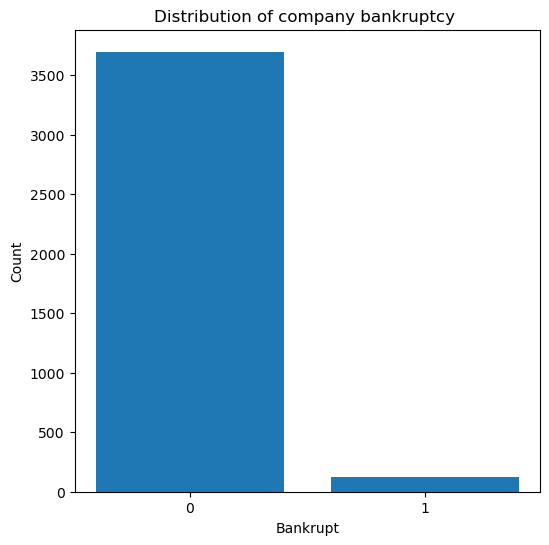

In [55]:
# Ploting class imbalance
fig, ax = plt.subplots(figsize=(6, 6)) 
ax.bar([0,1],y_train.value_counts())
ax.set_xlabel('Bankrupt')
ax.set_ylabel('Count')
ax.set_xticks([0,1])
ax.set_title('Distribution of company bankruptcy ')
plt.show()

To improve our model's ability to pick up bankrupt companies, we must resample our data set. There are generally two ways to do this:
- Undersampling the majority class.
- Oversampling the minority class.

Here, we'll take a look at the latter option using a technique called Synthetic Minority Over-sampling Technique (SMOTE). For a more in depth treatment of this technique please refer [here](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/).

To apply SMOTE, we'll have to use another library called Imbalanced Learn (imported as `imblearn`). To start, lets see how SMOTE resampling changes our class distribution:

In [56]:
# Importing SMOTE class from Imbalanced Learn
from imblearn.over_sampling import SMOTE

In [57]:
# Resampling data
sm = SMOTE(random_state=243)
X_res, y_res = sm.fit_resample(X_train, y_train)

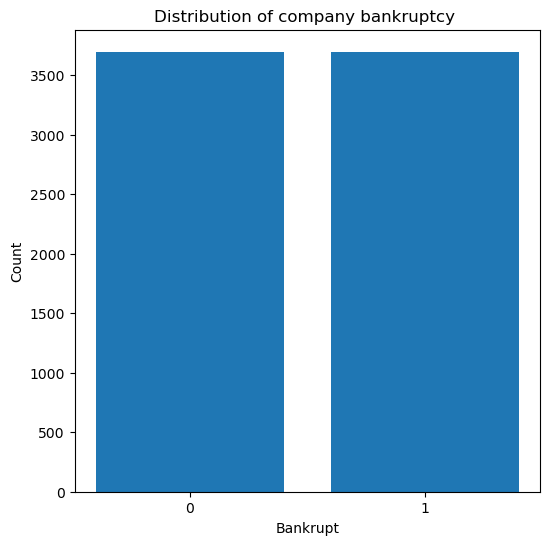

In [58]:
# Re-plotting class balance
fig, ax = plt.subplots(figsize=(6, 6)) 
ax.bar([0,1],y_res.value_counts())
ax.set_xlabel('Bankrupt')
ax.set_ylabel('Count')
ax.set_xticks([0,1])
ax.set_title('Distribution of company bankruptcy ')
plt.show()

What is great about this library is that it is built to integrate with scikit learn, so we can just add the SMOTE transformer onto our Pipelines. The only caveat is that, to do this, we must import the `make_pipeline()` function from Imbalanced Learn (for documentation, see [here](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.make_pipeline.html)). Have a go at changing our Pipelines (add SMOTE resampling as the first step) and then use these to predict on our validation samples:
- Import the `make_pipeline()` function from imblearn.
- Make a pipeline for each estimator by passing the following transformers (in order): SMOTE, Scaling, PCA, estimator.
- Fit on the training set and predict on the validation set using all three pipelines.
- Print out the classification report for all three models. 

> **Note:** The `.make_pipeline()` function, unlike the method `Pipeline()`, does not require a list of tuples as an argument. Instead, just pass in whatever transformers and estimators you want in order (separated by commas.) 

In [59]:
# Importing make_pipeline
from imblearn.pipeline import make_pipeline

In [60]:
# Create three Pipelines, one for each model
knn_pipe = make_pipeline(SMOTE(random_state=253), StandardScaler(), PCA(n_components=30), KNeighborsClassifier())

svm_pipe = make_pipeline(SMOTE(random_state=253), StandardScaler(), PCA(n_components=30), SVC())

log_reg_pipe = make_pipeline(SMOTE(random_state=253), StandardScaler(), PCA(n_components=30),LogisticRegression()) 

In [104]:

## the idea here is to train on a resampled dataset then test back on the original?

#preprocessing data for tSNE application with selective sampling
sm = SMOTE(random_state=243)
dat_X_res, dat_y_res = sm.fit_resample(data.drop(columns = 'Bankrupt'), data.Bankrupt)

#Scale data
scaler = StandardScaler()
X_res_scaled = scaler.fit_transform(dat_X_res)
#apply PCA
pcax = PCA(n_components=50)
X__res_scaled = pcax.fit_transform(X_res_scaled) 
#fit and tranasform with t-SNE
X_res_scaled_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=90.0,random_state = 320).fit_transform(X_res_scaled)



Text(0.5, 1.0, 't-SNE data visualisation on SMOTE resampled dataset')

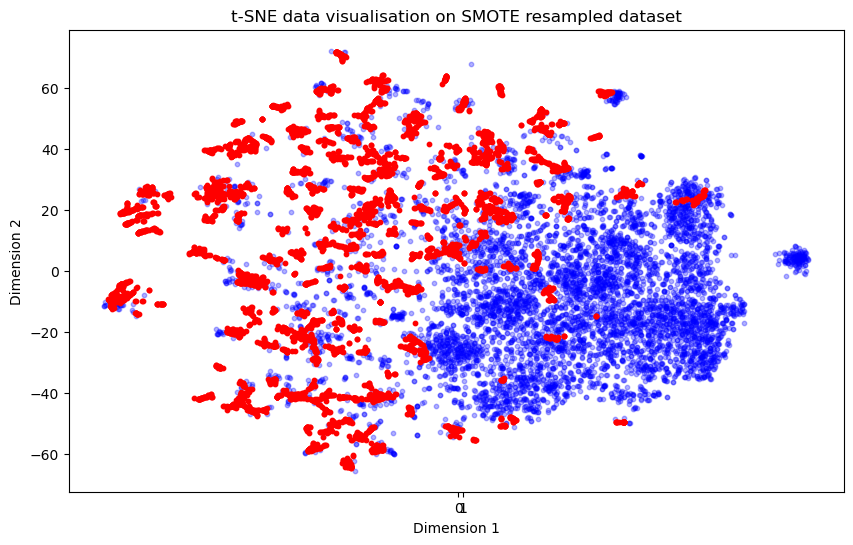

In [106]:
#resampled tSNE plot
fig, ax = plt.subplots(figsize = (10,6))


ax.scatter(X_res_scaled_embedded[dat_y_res == 0][:,0],X_res_scaled_embedded[dat_y_res == 0][:,1], c = 'b', alpha = 0.3, s = 10)
ax.scatter(X_res_scaled_embedded[dat_y_res == 1][:,0],X_res_scaled_embedded[dat_y_res == 1][:,1], c = 'r', s = 10)
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_xticks([0,1])
ax.set_title('t-SNE data visualisation on SMOTE resampled dataset')

There appears to be clearer clustering behaviour with t-SNE applied to the SMOTE resampled dataset 

In [109]:
'''
knn.fit(X_res_scaled_embedded,dat_y_res)
y_pred = knn.predict(X_val)
print('KNN trained on embedded dataset Classification Report')
print(confusion_matrix(y_val, y_pred))
'''

"\nknn.fit(X_res_scaled_embedded,dat_y_res)\ny_pred = knn.predict(X_val)\nprint('KNN trained on embedded dataset Classification Report')\nprint(confusion_matrix(y_val, y_pred))\n"

In [61]:
# Fit and predict KNN pipeline
knn_pipe.fit(X_train,y_train)
y_pred = knn_pipe.predict(X_val)
print('KNN Classification Report:')
print(classification_report(y_val, y_pred))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.93       920
           1       0.20      0.74      0.31        35

    accuracy                           0.88       955
   macro avg       0.59      0.81      0.62       955
weighted avg       0.96      0.88      0.91       955



In [ ]:
svm = SVC()
svm.fit(Xs_train, ys_train)
ys_pred = svm.predict(Xs_val)

In [62]:
# Fit and predict SVM pipeline
svm_pipe.fit(X_train, y_train)
y_pred = svm_pipe.predict(X_val)
print('SVM Classification Report:')
print(classification_report(y_val, y_pred))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       920
           1       0.24      0.80      0.37        35

    accuracy                           0.90       955
   macro avg       0.62      0.85      0.66       955
weighted avg       0.96      0.90      0.93       955



In [63]:
# Fit and predict Logistic Regression pipeline
log_reg_pipe.fit(X_train, y_train)
y_pred = log_reg_pipe.predict(X_val)
print('Logistic Regression Classification Report:')
print(classification_report(y_val, y_pred))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       920
           1       0.20      0.83      0.33        35

    accuracy                           0.87       955
   macro avg       0.60      0.85      0.63       955
weighted avg       0.96      0.87      0.91       955



### Wrapping it all up

We're nearly there! Now its time to train our models using the whole initial training set (training + validation) to then predict on the test set:
- Merge the training and validation sets into a new training set (covered in previous sessions).
- Fit each model on the new training set.
- Predict with each model on the test set.
- Print out the classification report of your predictions.

In [64]:
# Merging together training and validation samples
X_train = X_train.append(X_val, ignore_index=True, sort=False)
y_train = y_train.append(y_val, ignore_index=True) 

C:\Users\User\AppData\Local\Temp\ipykernel_3388\3581310937.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(X_val, ignore_index=True, sort=False)
C:\Users\User\AppData\Local\Temp\ipykernel_3388\3581310937.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(y_val, ignore_index=True)


In [65]:
print('X_train dimensions: ', X_train.shape)
print('y_train dimensions: ', y_train.shape)

X_train dimensions:  (4773, 95)
y_train dimensions:  (4773,)


In [66]:
# Fit and predict KNN pipeline
knn_pipe.fit(X_train, y_train)
y_pred = knn_pipe.predict(X_test)
print('KNN Classification Report:')
print(classification_report(y_test, y_pred))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.87      0.93      1981
           1       0.16      0.75      0.26        65

    accuracy                           0.86      2046
   macro avg       0.57      0.81      0.59      2046
weighted avg       0.96      0.86      0.90      2046



In [67]:
# Fit and predict SVM pipeline
svm_pipe.fit(X_train, y_train)
y_pred = svm_pipe.predict(X_test)
print('SVM Classification Report:')
print(classification_report(y_test, y_pred))


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1981
           1       0.19      0.71      0.30        65

    accuracy                           0.89      2046
   macro avg       0.59      0.80      0.62      2046
weighted avg       0.96      0.89      0.92      2046



In [68]:
# Fit and predict Logistic Regression pipeline
log_reg_pipe.fit(X_train, y_train)
y_pred = log_reg_pipe.predict(X_val)
print('Logistic Regression Classification Report:')
print(classification_report(y_val, y_pred))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93       920
           1       0.22      0.89      0.35        35

    accuracy                           0.88       955
   macro avg       0.61      0.88      0.64       955
weighted avg       0.97      0.88      0.91       955



## EDA

How are the features in our dataset distributed

In [69]:
data.describe()

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [70]:
#data.columns

In [71]:
print('The percentage of bankrupt companies in the dataset is',data['Bankrupt'].sum()/data.shape[0]*100,'%' )


The percentage of bankrupt companies in the dataset is 3.2262795131250916 %


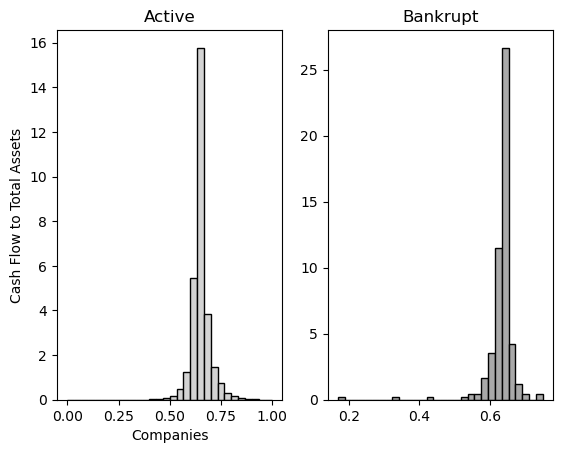

In [72]:
CBkrupt = data.loc[data['Bankrupt'] == 1]
# categories:' Cash Flow to Total Assets'; Allocation rate per person; Tax rate (A); 
# Create a histogram of company size for bankrupt companies
fig, ax = plt.subplots(1,2)
ax[0].hist(data[' Cash Flow to Total Assets'], bins=30, density=True, color="lightgray", edgecolor="black")
ax[0].set_title('Active')
ax[0].set_ylabel('Cash Flow to Total Assets')
ax[0].set_xlabel('Companies')
ax[1].hist(CBkrupt[' Cash Flow to Total Assets'], bins=30, density=True, color="darkgray", edgecolor="black")
ax[1].set_title('Bankrupt')
plt.show()

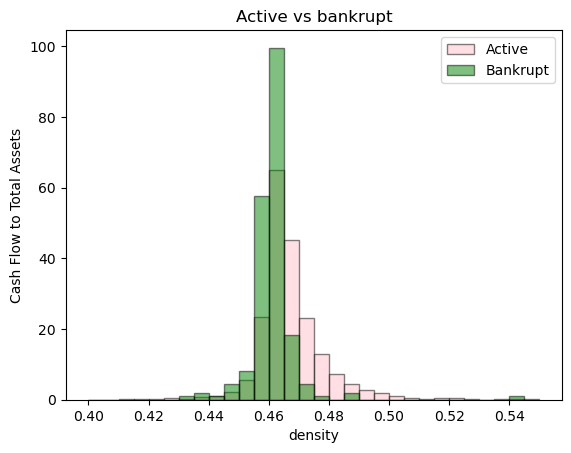

In [73]:
fig, ax = plt.subplots()
ax.hist(data[' Cash flow rate'],range=[0.4, 0.55], bins=30, density=True, color="pink", edgecolor="black",alpha = 0.5, label = 'Active')
ax.hist(CBkrupt[' Cash flow rate'], bins=30, range=[0.4, 0.55],density=True, color="green", edgecolor="black",alpha = 0.5, label = 'Bankrupt')
ax.set_title('Active vs bankrupt')
ax.set_ylabel('Cash Flow to Total Assets')
ax.set_xlabel('density')
plt.legend(loc = 'upper right')
plt.show()


This graph shows extreme difference as the total assets of bankrupt companies is logically quite low

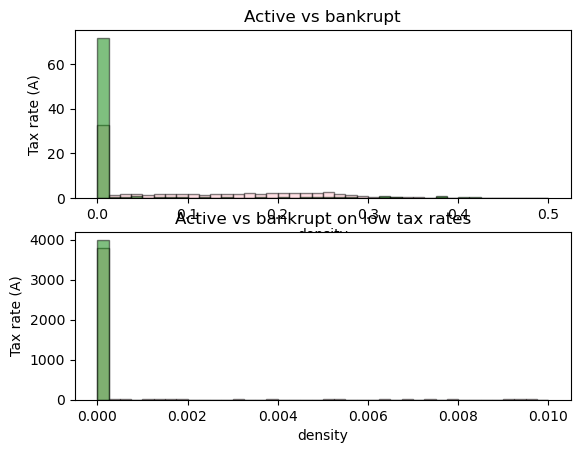

In [74]:
fig, ax = plt.subplots(2)
ax[0].hist(data[' Tax rate (A)'], bins=40, range = [0,0.5], density=True, color="pink", edgecolor="black",alpha = 0.5, label = 'Active')
ax[0].hist(CBkrupt[' Tax rate (A)'], bins=40,range = [0,0.5] ,density=True, color="green", edgecolor="black",alpha = 0.5, label = 'Bankrupt')
ax[0].set_title('Active vs bankrupt')
ax[0].set_ylabel('Tax rate (A)')
ax[0].set_xlabel('density')
ax[1].hist(data[' Tax rate (A)'], bins=40, range = [0,0.01], density=True, color="pink", edgecolor="black",alpha = 0.5, label = 'Active')
ax[1].hist(CBkrupt[' Tax rate (A)'], bins=40,range = [0,0.01] ,density=True, color="green", edgecolor="black",alpha = 0.5, label = 'Bankrupt')
ax[1].set_title('Active vs bankrupt on low tax rates')
ax[1].set_ylabel('Tax rate (A)')
ax[1].set_xlabel('density')
plt.show()
#we require true density in our histograms to compare datasets of different sizes
# tax exemptions once a company goes bankrupt

Tax exemptions apply to a higher proportion of bankrupt companies but there are more active companies that pay 0% tax

In [75]:
print('Proportion of companies with tax exemption that are bankrupt:',
      100*CBkrupt.loc[CBkrupt[' Tax rate (A)'] == 0].size/(data.loc[data[' Tax rate (A)'] == 0]).size,'%')


Proportion of companies with tax exemption that are bankrupt: 7.554517133956386 %


From this we can see that a given tax exempt company is twice as likely to be bankrupt than a given company from the general dataset.

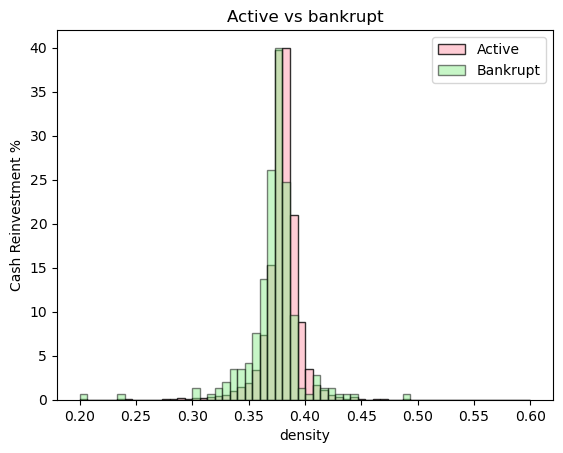

In [76]:
#' Cash Reinvestment %'
fig, ax = plt.subplots()
ax.hist(data[' Cash Reinvestment %'], bins=60,range=[0.2, 0.6], density=True, color="pink", edgecolor="black",alpha = 0.8, label = 'Active')
ax.hist(CBkrupt[' Cash Reinvestment %'], bins=60,range=[0.2, 0.6], density=True, color="lightgreen", edgecolor="black",alpha = 0.5, label = 'Bankrupt')
ax.set_title('Active vs bankrupt')
ax.set_ylabel('Cash Reinvestment %')
ax.set_xlabel('density')
plt.legend(loc = 'upper right')
plt.show()

In [77]:
#data.iloc[(data.mean() - CBkrupt.mean())>= 0.1]

### Taking it up a notch
With this, we come to the end of this project, although this does not mean that you're done by any means. The project explored today can be improved in many ways to achieve better results, and doing so is what will truly help you grow as a data scientist. Here are some suggestions for improvements to this particular project:
- **EDA:**
    - How are the features in our data set distributed?
    - What is the individual relationship of each of these with our target variable?
    
    
- **Dimentionality reduction:**
    - What number of components should we use to improve our predictions?
    - What other dimensionality reduction techniques are there? (Hint: have a look at manifold learning models like [tSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)) 
    
    
- **Preprocessing:**
    - What other scaling methods are there? Which is the best for this problem?
    - Is there any feature engineering that we can do? How?
    - How do other resampling methods affect performance?
    
    
- **Modelling:**
    - What other classification models can you use?
    - Try out ensemble models: random forests, LightGBM XGBoost... which works out best?
    - Can you optimize any hyperparameters? How?
    
- **Evaluation Metrics:**
    - Try looking at the ROC curve and the associated AUC metric [(link here)](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5). Can you implement these in your project? 
    
    
